In [ ]:
# import dependencies
import ultralytics
import torch
import cv2
import supervision as sv
import matplotlib.pyplot as plt
from ultralytics import YOLO
from collections import defaultdict

In [3]:
# load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

In [ ]:
# run inference on the video
model.predict(source="traffic.mp4", save=True, imgsz=320, conf=0.3)

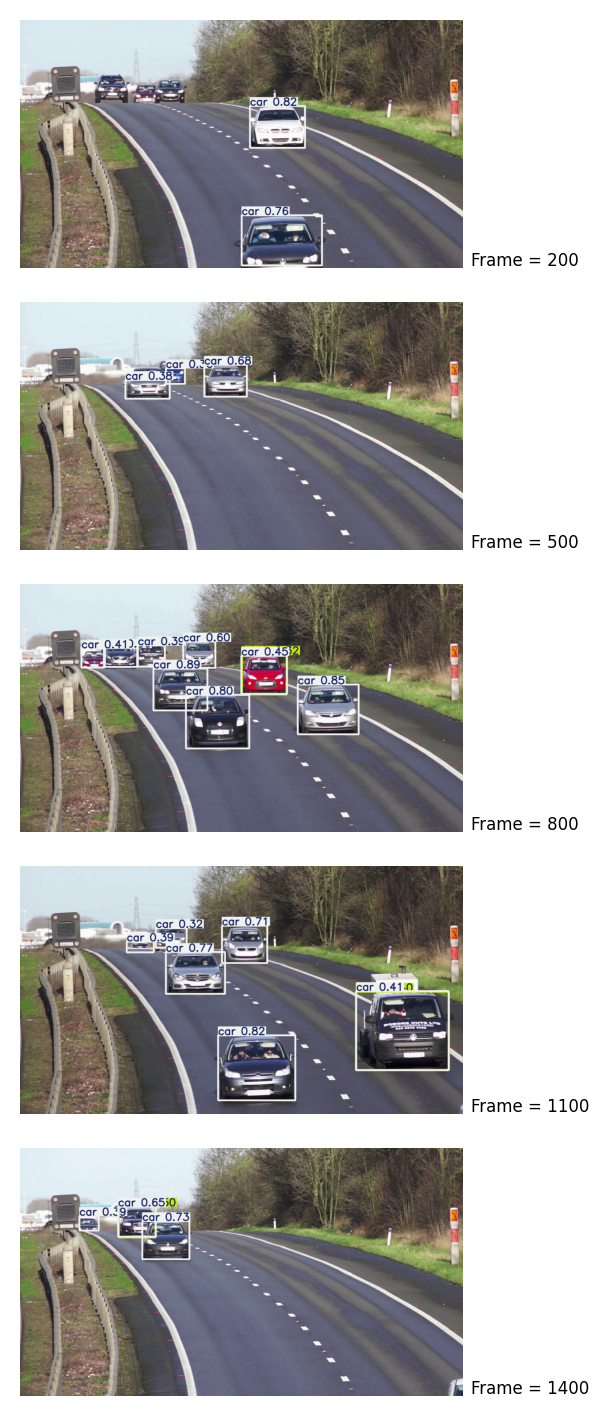

In [22]:
# show predicted video frame
video_path = "./runs/detect/predict/traffic.avi"
frame_index = [200, 500, 800, 1100, 1400]

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise RuntimeError("Error: Could not open video.")

fig, axs = plt.subplots(len(frame_index), 1, figsize=(12.8, 7.2), dpi=200)

for idx, frame_no in enumerate(frame_index):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    ret, frame = cap.read()

    if not ret:
        print(f"Error: Could not read frame {frame_no}")
        continue

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    axs[idx].imshow(frame_rgb)
    axs[idx].axis("off")
    axs[idx].text(
        1.02, 0.03, f"Frame = {frame_no}",
        transform=axs[idx].transAxes,
        va="center",
        fontsize=6
    )

cap.release()

plt.tight_layout()
plt.show()